In [352]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
import numpy as np

In [353]:
def basis_pol(data, degrees=2):
    copy = data.reshape(-1,1).copy()
    polynomials = np.ones((len(data),1))
    for i in range(0, degrees+1):
        polynomials = np.append(polynomials, copy**i, axis=1)
    return polynomials[:,1:]

In [354]:
def x(t, c_0=0, c_1=0, c_2=1):
    c = np.array([c_0,c_1,c_2])
    basis = basis_pol(t)
    return np.sum(c*basis, axis=1)

In [355]:
def beta_0(t):
    c = np.array([0,1,0])
    basis = basis_pol(t)
    return np.sum(c*basis, axis=1)

In [356]:
def beta(t):
    c = np.array([-0.2,-1.98,1])
    basis = basis_pol(t)
    return np.sum(c*basis, axis=1)

In [357]:
def y(t, c_0):
    return beta_0(t) - beta(t)*x(t, c_0=c_0)

TypeError: __init__() missing 1 required positional argument: 'label'

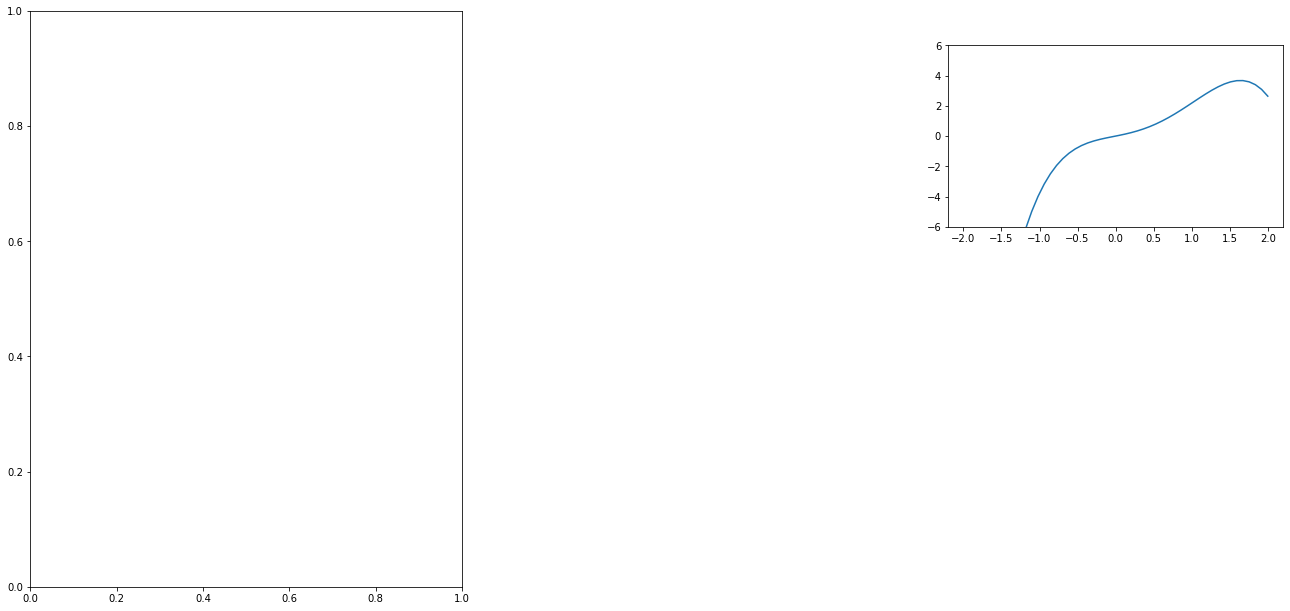

In [358]:
t = np.linspace(-2.0, 2.0)
c_0 = 0
res = y(t, c_0)
plt.plot(t,res)
plt.ylim([-6,6])
plt.subplots_adjust(bottom=0.25)
# Make a horizontal slider to controls the c_0.
axfreq = plt.axes([-2, -1, 1, 2])
freq_slider = Slider(
    ax=axfreq,
    valmin=0.1,
    valmax=30,
    valinit=c_0,
)
plt.show()